In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn import metrics as mt


In [104]:
# Load the data
data = pd.read_csv('../../data/manufacturing.csv')

In [105]:
data.head()

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
0,209.762701,8.050855,1688.769167,44522.217074,9.229576e+06,99.999971
1,243.037873,15.812068,3842.931469,63020.764997,1.435537e+07,99.985703
2,220.552675,7.843130,1729.823314,49125.950249,1.072839e+07,99.999758
3,208.976637,23.786089,4970.736918,57128.881547,9.125702e+06,99.999975
4,184.730960,15.797812,2918.345014,38068.201283,6.303792e+06,100.000000


In [106]:
data.shape

(3957, 6)

In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3957 entries, 0 to 3956
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Temperature (°C)                3957 non-null   float64
 1   Pressure (kPa)                  3957 non-null   float64
 2   Temperature x Pressure          3957 non-null   float64
 3   Material Fusion Metric          3957 non-null   float64
 4   Material Transformation Metric  3957 non-null   float64
 5   Quality Rating                  3957 non-null   float64
dtypes: float64(6)
memory usage: 185.6 KB


In [108]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature (°C),3957.0,2.000347e+02,5.813572e+01,100.014490,1.508713e+02,1.986034e+02,2.513666e+02,2.999928e+02
Pressure (kPa),3957.0,1.481556e+01,5.772040e+00,5.003008,9.692984e+00,1.483256e+01,1.974968e+01,2.499913e+01
Temperature x Pressure,3957.0,2.955321e+03,1.458225e+03,513.706875,1.798247e+03,2.678278e+03,3.929058e+03,7.365019e+03
Material Fusion Metric,3957.0,4.812718e+04,2.381221e+04,10156.971955,2.762693e+04,4.461145e+04,6.780544e+04,1.037562e+05
Material Transformation Metric,3957.0,1.003645e+07,7.599356e+06,999946.221844,3.433810e+06,7.833390e+06,1.588251e+07,2.699783e+07
Quality Rating,3957.0,9.626018e+01,1.299226e+01,1.000000,9.994113e+01,1.000000e+02,1.000000e+02,1.000000e+02


In [109]:
data.isnull().sum()

Temperature (°C)                  0
Pressure (kPa)                    0
Temperature x Pressure            0
Material Fusion Metric            0
Material Transformation Metric    0
Quality Rating                    0
dtype: int64

In [110]:
# model

X = data.drop('Quality Rating',axis=1)
y = data['Quality Rating']


In [111]:
def score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2_train = model.score(X_train, y_train)
    r2_test = model.score(X_test, y_test)
    rmse_train = np.sqrt(mt.mean_squared_error(y_train, model.predict(X_train)))
    rmse_test = np.sqrt(mt.mean_squared_error(y_test, model.predict(X_test)))
    return r2_train, r2_test, rmse_train, rmse_test, y_pred


In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



Linear Regression
R2 Train: 0.5021702258011791
R2 Test: 0.5145614194018854
RMSE Train: 8.920899803046925
RMSE Test: 9.955027924399433


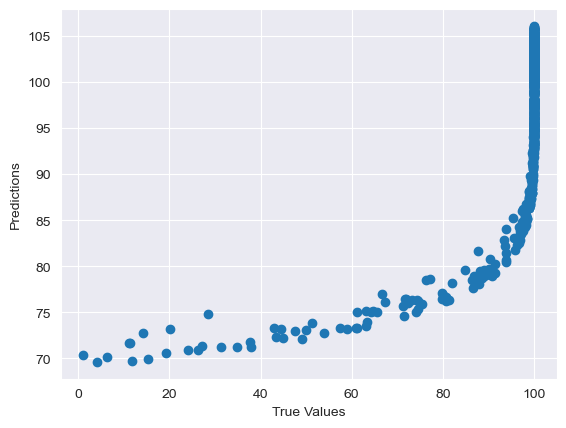

In [113]:
# Linear Regression
model = LinearRegression()
r2_train, r2_test, rmse_train, rmse_test,y_pred_linear = score(model, X_train, X_test, y_train, y_test)
print('Linear Regression')
print('R2 Train:', r2_train)
print('R2 Test:', r2_test)
print('RMSE Train:', rmse_train)
print('RMSE Test:', rmse_test)

plt.scatter(y_test, y_pred_linear)

plt.xlabel('True Values')
plt.ylabel('Predictions')

plt.show()


Polynomial Regression
R2 Train: 0.91320507937798
R2 Test: 0.923863806001297
RMSE Train: 3.724906561351708
RMSE Test: 3.9424928957292265


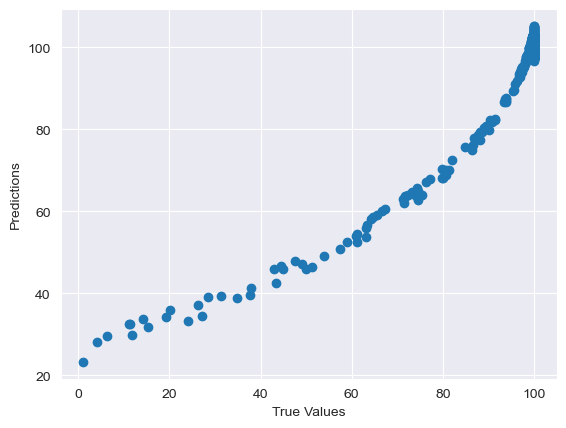

In [114]:
# Polynomial Regression
poly = PolynomialFeatures()
X_poly = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)
model = LinearRegression()
r2_train, r2_test, rmse_train, rmse_test,y_pred_pol = score(model, X_train, X_test, y_train, y_test)
print('Polynomial Regression')
print('R2 Train:', r2_train)
print('R2 Test:', r2_test)
print('RMSE Train:', rmse_train)
print('RMSE Test:', rmse_test)

plt.scatter(y_test, y_pred_pol)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()



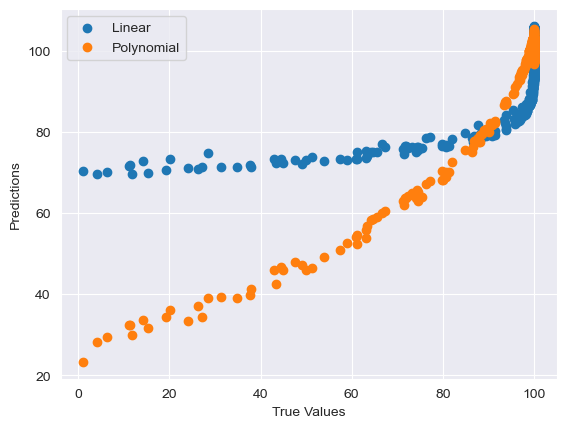

In [115]:
# plot the predictions

plt.scatter(y_test, y_pred_linear, label='Linear')
plt.scatter(y_test, y_pred_pol, label='Polynomial')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.legend()
plt.show()


